
# **Importação do Drive com os arquivos**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **Importação inicial das bibliotecas**


In [ ]:
import torch
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
import math
import re
import os
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
!pip install bert-for-tf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 867.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30509 sha256=075094005a2a7733989c8d19230e06f3dbf1ec2911ed73645ea8a0778a7d3177
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19454 sha256=e1308a79b6c46c188d5f22175fa23a7d3f20e2e06471e6c1b588975230b6d580
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7891 sha256=ff6f47d506460a491a2cbda4d540dc8518e21f918bc6f8890a2d79b6137f3464
  Stored in directory: /root/.cache/pip/wheels/69/c8/b3/92666cff9fb312bc3473eaa6b396695b89a7b3e31e9087

In [ ]:
!pip install transformers

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=166c2e7cbd6e6286255185d63d11fe600db688fb87b3c8f0288c5d8244f1d6b3
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
import tensorflow_hub as hub

In [ ]:
from tensorflow.keras import layers
import bert

In [ ]:
tf.__version__

'2.15.0'

# **Part 1 - Data Preprocessing**


####Criação do DataFrame

In [ ]:
def read_and_concatenate_dataframes(directory, new_column_name, value):
    """
    Read JSONL files in the specified directory, add a new column to each DataFrame,
    and concatenate all DataFrames into a single DataFrame.

    Parameters:
    - directory: The path to the directory containing JSONL files.
    - new_column_name: The name of the new column to be added.
    - value: The value to be assigned to the new column.

    Returns:
    A DataFrame containing all the concatenated data.
    """

    data_frames_list = []

    for file_name in os.listdir(directory):
        if file_name.endswith('.jsonl'):
            file_path = os.path.join(directory, file_name)

            temp_df = pd.read_json(file_path, lines=True, encoding='latin1')

            temp_df[new_column_name] = value

            data_frames_list.append(temp_df)

    result_df = pd.concat(data_frames_list, ignore_index=True)

    return result_df

directory_pathG = '/content/drive/MyDrive/opengpttext-clean/chatgpt'
directory_pathH = '/content/drive/MyDrive/opengpttext-clean/openweb'
new_column = 'value'

data_gpt = read_and_concatenate_dataframes(directory_pathG, new_column, value=1)
data_human = read_and_concatenate_dataframes(directory_pathH, new_column, value=0)

In [ ]:
data_human

,uid,text,value
0,[urlsf_subset04]-[69],Image caption Phobos is the larger and closer ...,0
1,[urlsf_subset04]-[99],WASHINGTON -- The United States military bombe...,0
2,[urlsf_subset04]-[167],One of the more controversial topics involving...,0
3,[urlsf_subset04]-[191],Image copyright Thinkstock Image caption The M...,0
4,[urlsf_subset04]-[269],"Books, books everywhere, but still not a page ...",0
...,...,...,...
29137,[urlsf_subset05]-[388786],"May 27, 2017\nBy David Coletto\nAs the Conserv...",0
29138,[urlsf_subset05]-[389233],If Knicks president Phil Jackson wanted to tal...,0
29139,[urlsf_subset05]-[389455],"""I fear a Man of frugal Speech..."" (543)\nEmil...",0
29140,[urlsf_subset05]-[389598],"If Donald Trump actually cared about ""rigged"" ...",0


In [ ]:
data_gpt

,uid,text,value
0,[urlsf_subset01]-[362358],The US is to review its military support for S...,1
1,[urlsf_subset01]-[116340],Some game developers are seeking inspiration f...,1
2,[urlsf_subset01]-[299487],IntercontinentalExchange's acquisition of the ...,1
3,[urlsf_subset01]-[137018],According to research from The University of W...,1
4,[urlsf_subset01]-[302038],The Davao City Council has declared comedian R...,1
...,...,...,...
29390,[urlsf_subset05]-[141028],"The article ""Creative underexposure with a Nik...",1
29391,[urlsf_subset05]-[49964],The special education services that New York S...,1
29392,[urlsf_subset05]-[116459],"During the third week of the trial, two opposi...",1
29393,[urlsf_subset05]-[67867],"Mogwai Young Team, the debut studio album by S...",1


In [ ]:
data_human.shape

(29142, 3)

In [ ]:
data_human.shape

(29142, 3)

In [ ]:
data_gpt.shape

(29395, 3)

####Combinação dos Dados



In [ ]:
combined_data = pd.concat([data_gpt, data_human], ignore_index=True)
combined_data = combined_data.drop(combined_data.columns[0], axis=1)

In [ ]:
combined_data

,text,value
0,The US is to review its military support for S...,1
1,Some game developers are seeking inspiration f...,1
2,IntercontinentalExchange's acquisition of the ...,1
3,According to research from The University of W...,1
4,The Davao City Council has declared comedian R...,1
...,...,...
58532,Academic freedom -- for conservatives -- died ...,0
58533,When Dylan Higgins invited me on to the Field ...,0
58534,John Kasich. AP Photo/John Minchillo\nJohn Kas...,0
58535,A Navy-funded thermal engine bobbing off the c...,0


In [ ]:
combined_data.head()

,text,value
0,The US is to review its military support for S...,1
1,Some game developers are seeking inspiration f...,1
2,IntercontinentalExchange's acquisition of the ...,1
3,According to research from The University of W...,1
4,The Davao City Council has declared comedian R...,1


In [ ]:
combined_data.tail()

,text,value
58532,Academic freedom -- for conservatives -- died ...,0
58533,When Dylan Higgins invited me on to the Field ...,0
58534,John Kasich. AP Photo/John Minchillo\nJohn Kas...,0
58535,A Navy-funded thermal engine bobbing off the c...,0
58536,A U.S. Army Black Hawk helicopter is seen. (Ph...,0


# **Part 2 - Métricas de Análise do DataSet**



### **Cálculo do comprimento dos Textos**


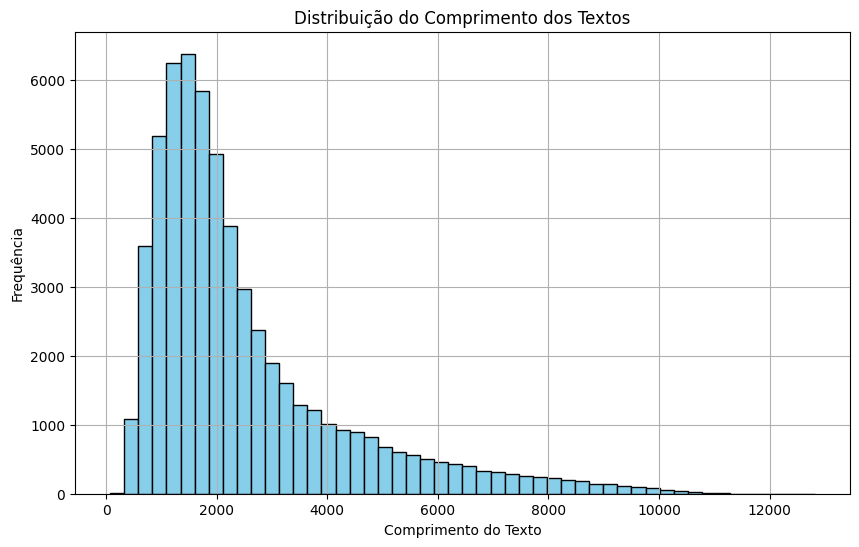

In [ ]:
text_data = pd.DataFrame({
    'text': combined_data['text'],
    'text_length': combined_data['text'].apply(len)
})

plt.figure(figsize=(10, 6))
plt.hist(text_data['text_length'], bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.title('Distribuição do Comprimento dos Textos')

plt.grid(True)
plt.show()


### **Cálculo da diversidade vocabular de um texto**


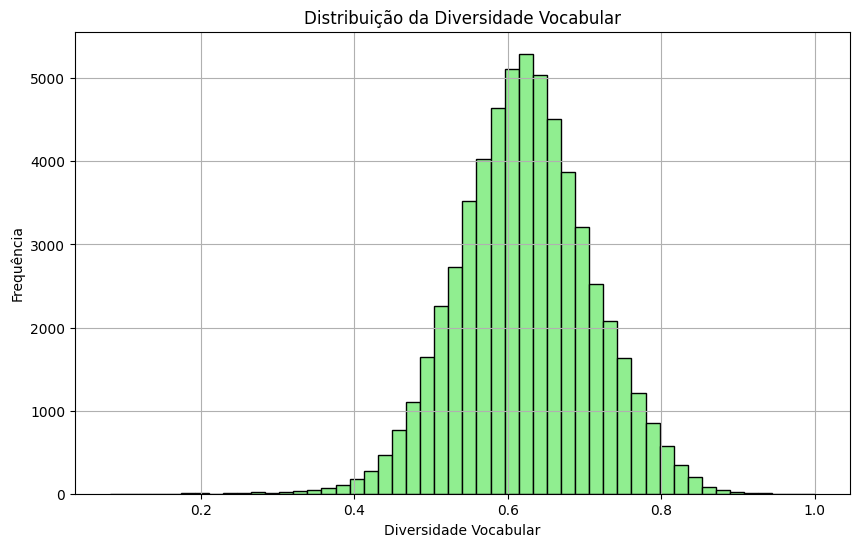

In [ ]:
def calculate_vocab_diversity(text):
    tokens = text.split()
    unique_tokens = set(tokens)
    num_tokens = len(tokens)
    num_unique_tokens = len(unique_tokens)

    if num_tokens > 0:
        diversity = num_unique_tokens / num_tokens
    else:
        diversity = 0

    return diversity

vocab_diversity = combined_data['text'].apply(calculate_vocab_diversity)

plt.figure(figsize=(10, 6))
plt.hist(vocab_diversity, bins=50, color='lightgreen', edgecolor='black')

plt.xlabel('Diversidade Vocabular')
plt.ylabel('Frequência')
plt.title('Distribuição da Diversidade Vocabular')

plt.grid(True)
plt.show()


### **Análise de Sentimento**


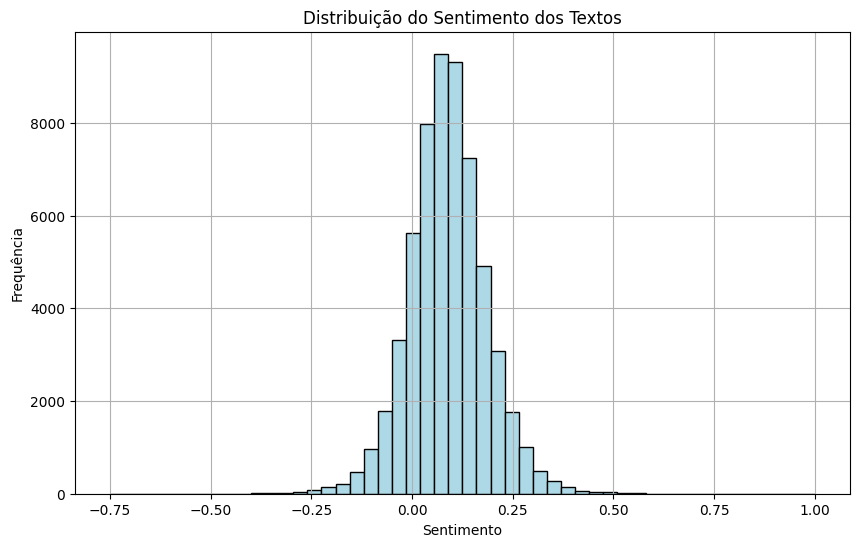

In [ ]:
from textblob import TextBlob

def calculate_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

sentiments = combined_data['text'].apply(calculate_sentiment)

plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=50, color='lightblue', edgecolor='black')

plt.xlabel('Sentimento')
plt.ylabel('Frequência')
plt.title('Distribuição do Sentimento dos Textos')

plt.grid(True)
plt.show()


### **Análise de Distribuição de Textos**


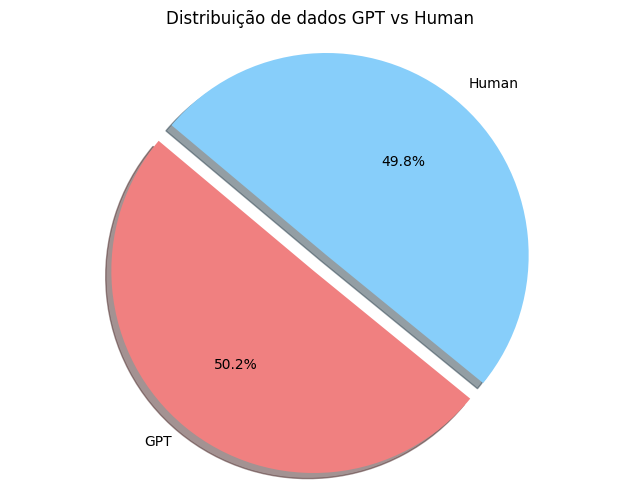

In [ ]:
value_counts = combined_data['value'].value_counts()

labels = ['GPT', 'Human']
sizes = value_counts.values
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribuição de dados GPT vs Human')
plt.show()


### **Análise de Distribuição de Tokens**


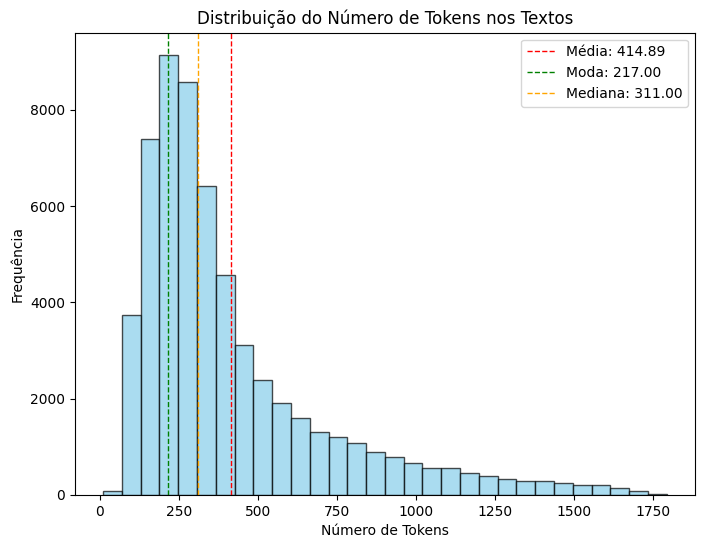

In [ ]:
import matplotlib.pyplot as plt

token_counts = combined_data['text'].apply(lambda x: len(x.split()))

mean_tokens = token_counts.mean()
mode_tokens = token_counts.mode()[0]
median_tokens = token_counts.median()

plt.figure(figsize=(8, 6))

plt.hist(token_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(mean_tokens, color='red', linestyle='dashed', linewidth=1, label=f'Média: {mean_tokens:.2f}')
plt.axvline(mode_tokens, color='green', linestyle='dashed', linewidth=1, label=f'Moda: {mode_tokens:.2f}')
plt.axvline(median_tokens, color='orange', linestyle='dashed', linewidth=1, label=f'Mediana: {median_tokens:.2f}')

plt.xlabel('Número de Tokens')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Tokens nos Textos')
plt.legend()

plt.show()

# **Part 3 - Arquitetura de Modelos**


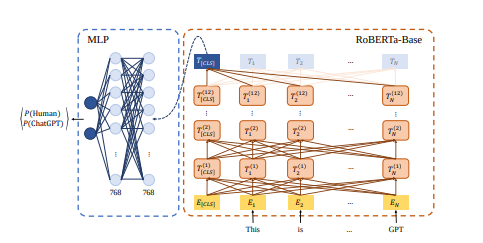
____________________________________________________________
## Detalhando o RoBERTa-Base

O RoBERTa-Base, um modelo popular, adota uma arquitetura com 12 camadas, cada uma composta por 768 neurônios, também denominados unidades de processamento. Durante a etapa de tokenização e processamento do texto, cada token (seja palavra ou subpalavra) é representado por um vetor de 768 valores numéricos.

A camada de classificação, usada em tarefas específicas (como classificação de texto, perguntas e respostas, entre outras), recebe como entrada esses vetores de representação, também conhecidos como embeddings, com dimensão de 768. Para realizar a classificação, um modelo adicional, como uma Multilayer Perceptron (MLP), é anexado ao final dessas representações para executar a tarefa desejada, como a classificação de texto em categorias.

Portanto, ao mencionar a necessidade de 768 neurônios na camada de classificação para receber vetores ocultos de 768 dimensões, isso significa que a camada de classificação deve ter a mesma dimensionalidade dos vetores ocultos produzidos pelo modelo, permitindo o processamento consistente dessas representações para a tarefa específica.

A escolha de 768 neurônios na camada de classificação garante a compatibilidade e capacidade do modelo de processar e classificar corretamente as representações ocultas aprendidas pelo RoBERTa, mantendo a integridade das informações essenciais durante a etapa de classificação ou tarefa específica em execução.
____________________________________________________________

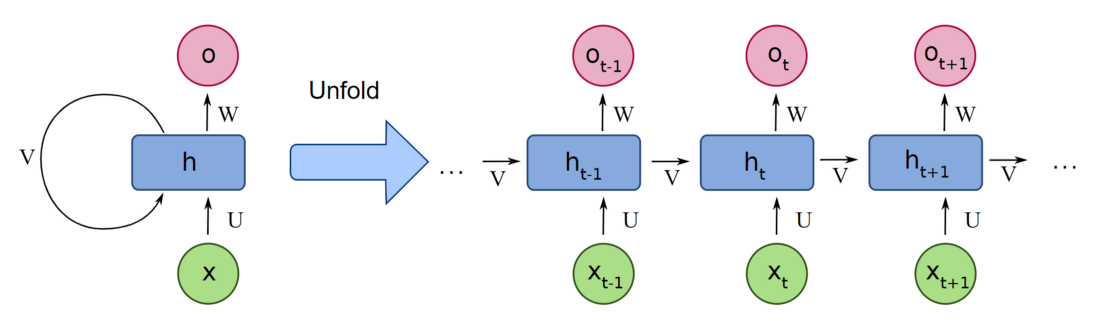

____________________________________________________________
## Detalhando RNN
Uma RNN é projetada para lidar com dados sequenciais, como séries temporais ou texto. Aqui estão os componentes principais:

Entrada (Input): Em cada passo, a RNN recebe uma entrada, que pode ser um vetor de características, uma palavra em uma sequência de palavras, ou qualquer dado sequencial.

Estado Oculto (Hidden State): A RNN mantém um estado oculto que atua como sua "memória". Esse estado é atualizado a cada passo, levando em consideração a entrada atual e o estado oculto anterior.

Função de Atualização (Update Function): A função de atualização utiliza a entrada atual e o estado oculto anterior para calcular o novo estado oculto. Isso ajuda a capturar as informações das etapas anteriores.

Saída (Output): Com base no estado oculto atualizado, a RNN gera uma saída. Essa saída pode ser usada para prever o próximo elemento em uma sequência, classificar um dado, ou realizar outras tarefas, dependendo do propósito da rede.

As RNNs são poderosas para lidar com dados sequenciais, mas têm desafios, como o problema do desaparecimento do gradiente. Para contornar isso, arquiteturas mais avançadas, como LSTMs e GRUs, foram desenvolvidas.
____________________________________________________________

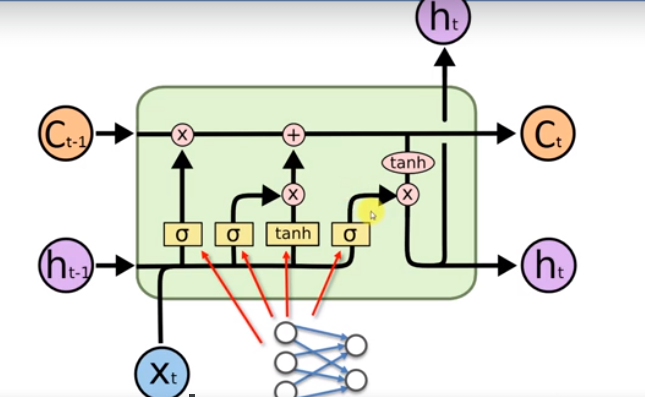

____________________________________________________________
## Detalhando o LSTM
A LSTM é composta por células de memória, e cada célula tem três portões: esquecimento (forget gate), entrada (input gate), e saída (output gate). Vamos detalhar cada parte:

Célula de Memória (Memory Cell): A célula de memória é a unidade principal que mantém a informação. Ela é atualizada multiplicando o conteúdo anterior da célula de memória por um valor decidido pelo portão de esquecimento e adicionando o resultado ponderado do portão de entrada.

Portão de Esquecimento (Forget Gate): Este portão decide que parte da informação anterior da célula de memória deve ser mantida. Ele recebe como entrada o estado anterior da célula de memória e a entrada atual e produz um valor entre 0 e 1 para cada elemento, representando o quanto deve ser esquecido.

Portão de Entrada (Input Gate): Este portão decide quais novas informações serão armazenadas na célula de memória. É dividido em duas partes:

Uma camada sigmoid que decide quais valores serão atualizados.

Uma camada tanh que gera candidatos a novos valores.

Atualização do Estado de Memória: A célula de memória é atualizada multiplicando o estado anterior pelo resultado do portão de esquecimento e adicionando o resultado do produto entre o portão de entrada sigmoid e a camada tanh.

Portão de Saída (Output Gate): Este portão decide qual parte do estado de memória será a saída da célula. Ele passa o estado da célula de memória através de uma camada sigmoid e, em seguida, aplica uma função tanh para normalizar os valores. O resultado final é multiplicado pelo resultado do portão sigmoid para produzir a saída final.
____________________________________________________________

# **Part 4 - Limpeza dos Textos**


In [ ]:
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9_]+", '', text)
    text = re.sub(r"https?://[A-Za-z0-9./]+", '', text)
    text = re.sub(r"[^A-Za-z.!?']", ' ', text)
    text = re.sub(r" +", ' ', text)
    return text

In [ ]:
data_clean = [clean_text(text) for text in combined_data.text]

In [ ]:
data_clean[0:3]

["The US is to review its military support for Saudi Arabia as officials warn it will be influenced by whether the kingdom commits to a ceasefire with Houthi rebels in Yemen according to an anonymous source speaking at a press conference. The review follows a Saudi strike on a funeral in the Yemeni capital Sanaa on October which killed more than people. The attack stiffened US concerns about its role in the war which has led to the deaths of more than non combatants. Assistance may continue for the Saudi US border but this will depend on the review's internal deliberations.",
 "Some game developers are seeking inspiration for VR by looking to the past but Funktronix Labs has taken it one step further by releasing its first person VR RTS Cosmic Trip for the Virtual Boy. The game design studio was first taken seriously when it posted a mockup of its design on Reddit a few months ago. If we say we are going to target that platform you better freakin' believe that it is coming to that plat

In [ ]:
data_labels = combined_data.value.values
data_labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
def encode_sentence(sent, max_length=512):
    tokens = ["[CLS]"] + tokenizer.tokenize(sent) + ["[SEP]"]
    if len(tokens) > max_length:
        tokens = tokens[:max_length]
        tokens[-1] = "[SEP]"
    return tokens

In [ ]:
encode_sentence("I love before")

['[CLS]', 'i', 'love', 'before', '[SEP]']

In [ ]:
data_inputs = [encode_sentence(sentence) for sentence in data_clean]

In [ ]:
print(data_inputs[0:2])

[['[CLS]', 'jazz', '##man', 'acknowledges', 'that', 'it', 'isn', "'", 't', 'possible', 'to', 'ban', 'sp', '##ra', '##wl', 'based', 'on', 'personal', 'dislike', 'that', 'goes', 'against', 'america', "'", 's', 'freedoms', '.', 'however', 'he', 'wonders', 'if', 'there', 'are', 'any', 'efforts', 'being', 'made', 'to', 'prevent', 'it', 'and', 'how', 'one', 'might', 'mit', '##igate', 'its', 'effects', '.', 'he', 'notes', 'that', 'once', 'land', 'is', 'developed', 'it', 'becomes', 'challenging', 'to', 'reduce', 'its', 'impacts', '.', 'his', 'questions', 'are', 'not', 'meant', 'to', 'judge', 'anyone', 'he', 'is', 'simply', 'curious', 'and', 'wants', 'answers', '.', 'many', 'people', 'have', 'tried', 'to', 'accomplish', 'what', 'jazz', '##man', 'is', 'asking', 'but', 'getting', 'municipalities', 'to', 'pass', 'legislation', 'against', 'sp', '##ra', '##wl', 'and', 'promoting', 'in', '##fi', '##ll', 'development', 'is', 'complicated', '.', 'various', 'ideas', 'have', 'been', 'suggested', 'such', 

## Criação da Base de Dados

In [ ]:
def get_ids(tokens):
  return tokenizer.convert_tokens_to_ids(tokens)

In [ ]:
np.char.not_equal("[PAD]", "[PAD]")

array(False)

In [ ]:
def get_mask(tokens):
  return np.char.not_equal(tokens, "[PAD]").astype(int)

In [ ]:
get_mask(tokenizer.tokenize("My dog likes strawberries."))

array([1, 1, 1, 1, 1, 1])

In [ ]:
def get_segments(tokens):
  seg_ids = []
  current_seg_id = 0
  for tok in tokens:
    seg_ids.append(current_seg_id)
    if tok == "[SEP]":
      current_seg_id = 1 - current_seg_id
  return seg_ids

In [ ]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key = lambda x: x[2])
sorted_all = [([get_ids(sent_lab[0]),
               get_mask(sent_lab[0]),
               get_segments(sent_lab[0])],
              sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7]

In [ ]:
sorted_all[0]

([[101,
   1996,
   20423,
   2003,
   2525,
   1999,
   3674,
   20423,
   2015,
   2061,
   2053,
   16360,
   13492,
   7741,
   4072,
   1012,
   102],
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 1)

In [ ]:
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 64
all_batched = all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES_TEST = NB_BATCHES // 2
all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)

In [ ]:
train_data_list = list(train_dataset)

total_size_train_dataset = len(train_data_list)

print("Tamanho total do conjunto de dados de treinamento:", total_size_train_dataset)

Tamanho total do conjunto de dados de treinamento: 458


In [ ]:
len(sorted_all)

476

In [ ]:
NB_BATCHES_TEST

914

# **Part 5 - Construção do Modelo**



### **Arquitetura DCNNBERT**


In [ ]:
class DCNNBERTEmbedding(tf.keras.Model):

    def __init__(self,
                 nb_filters=50,
                 FFN_units=512,
                 nb_classes=2,
                 dropout_rate=0.1,
                 name="dcnn"):
        super(DCNNBERTEmbedding, self).__init__(name=name)

        self.bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                                         trainable = False)

        self.bigram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=2,
                                    padding="valid",
                                    activation="relu")
        self.trigram = layers.Conv1D(filters=nb_filters,
                                     kernel_size=3,
                                     padding="valid",
                                     activation="relu")
        self.fourgram = layers.Conv1D(filters=nb_filters,
                                      kernel_size=4,
                                      padding="valid",
                                      activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        self.dense_1 = layers.Dense(units=FFN_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=nb_classes,
                                           activation="softmax")

    def embed_with_bert(self, all_tokens):
      _, embs = self.bert_layer([all_tokens[:, 0, :],
                                 all_tokens[:, 1, :],
                                 all_tokens[:, 2, :]])
      return embs

    def call(self, inputs, training):
        x = self.embed_with_bert(inputs)

        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)

        merged = tf.concat([x_1, x_2, x_3], axis=-1)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)

        return output

# **Part 6 - Treinamento do Modelo**



### **Definição de Hiperparamêtros**


In [ ]:
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 2
DROPOUT_RATE = 0.5
BATCH_SIZE = 32
NB_EPOCHS = 3

In [ ]:
Dcnn = DCNNBERTEmbedding(nb_filters=NB_FILTERS,
                         FFN_units=FFN_UNITS,
                         nb_classes=NB_CLASSES,
                         dropout_rate=DROPOUT_RATE)

In [ ]:
if NB_CLASSES == 2:
    Dcnn.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
else:
    Dcnn.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=["sparse_categorical_accuracy"])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/opengpttext-clean/fine_tuning_models_64"

ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=1)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")

Latest checkpoint restored!!


In [ ]:
class MyCustomCallBack(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        ckpt_manager.save()
        print("Checkpoint saved at {}.".format(checkpoint_path))

In [ ]:
history = Dcnn.fit(train_dataset,
                   epochs=NB_EPOCHS,
                   callbacks=[MyCustomCallBack()])

Epoch 1/3
    458/Unknown - 315s 638ms/step - loss: 0.2062 - accuracy: 0.9192Checkpoint saved at /content/drive/MyDrive/opengpttext-clean/fine_tuning_models_64.
458/458 [==============================] - 317s 642ms/step - loss: 0.2062 - accuracy: 0.9192
Epoch 2/3
458/458 [==============================] - 242s 518ms/step - loss: 0.0934 - accuracy: 0.9660
Epoch 3/3
458/458 [==============================] - 242s 518ms/step - loss: 0.0550 - accuracy: 0.9800


# Part 7 - Métricas de Avaliação

In [ ]:
y_pred = Dcnn.predict(test_dataset)

y_true = np.concatenate([y for x, y in test_dataset], axis=0)

457/457 [==============================] - 112s 243ms/step



### **Avaliação do Modelo**


In [ ]:
results = Dcnn.evaluate(test_dataset)
print(results)

457/457 [==============================] - 112s 246ms/step - loss: 0.1896 - accuracy: 0.9312
[0.18962319195270538, 0.9311747550964355]



### **Matriz de Confusão**


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred > 0.5)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 7782   486]
 [ 1527 19453]]


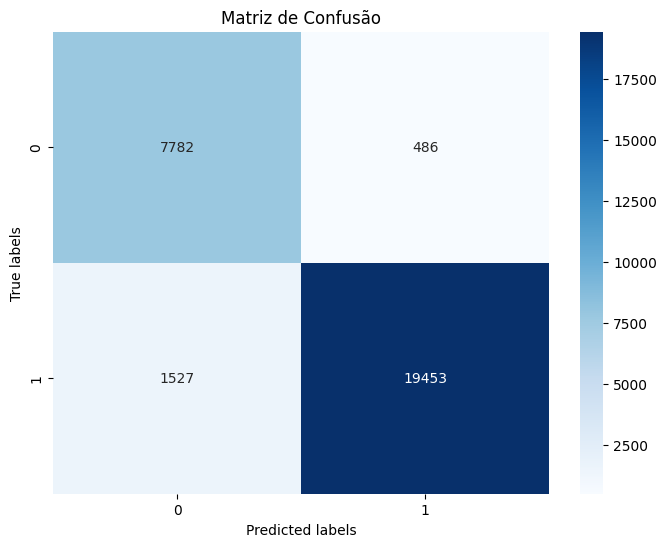

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred > 0.5)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


### **Precision**


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred > 0.5)
print("Precision:", precision)

Precision: 0.975625658257686


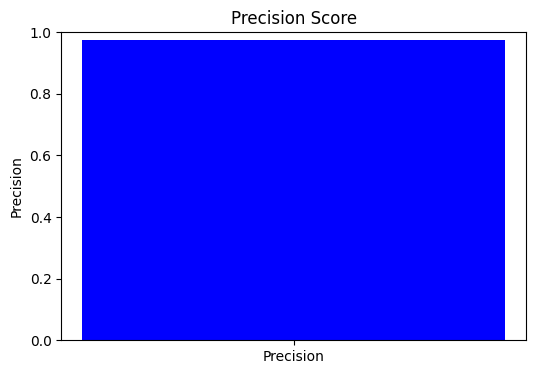

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

precision = precision_score(y_true, y_pred > 0.5)

labels = ['Precision']
values = [precision]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='blue')
plt.title('Precision Score')
plt.ylim(0, 1)
plt.ylabel('Precision')
plt.show()


### **ROC-AUC Score**


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9839200994519628


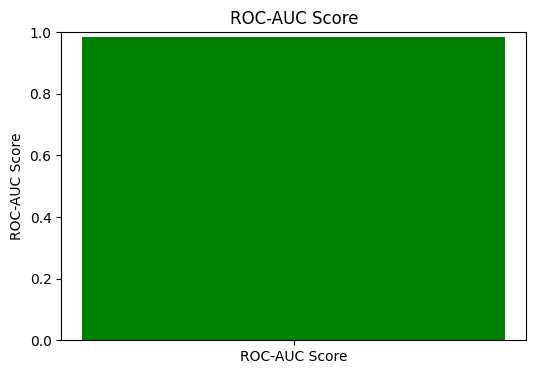

In [ ]:
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_true, y_pred)

labels = ['ROC-AUC Score']
values = [roc_auc]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='green')
plt.title('ROC-AUC Score')
plt.ylim(0, 1)
plt.ylabel('ROC-AUC Score')
plt.show()


### **Recall**


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred > 0.5)
print("Recall:", recall)

Recall: 0.9272163965681601



### **F1-Score**


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred > 0.5)
print("F1-Score:", f1)

F1-Score: 0.9508052493951465


### **Curva ROC (Receiver Operating Characteristic)**


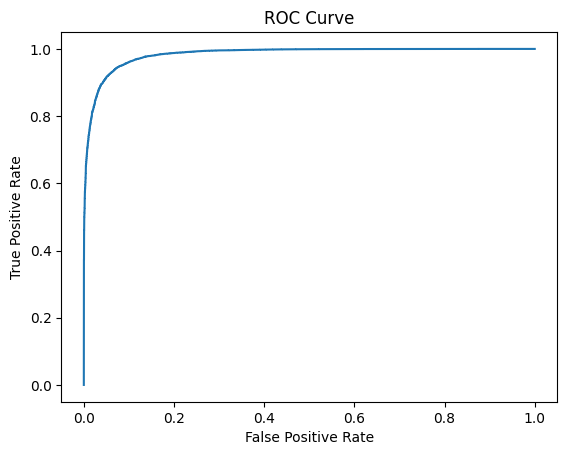

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### **Curva Precision-Recall:**

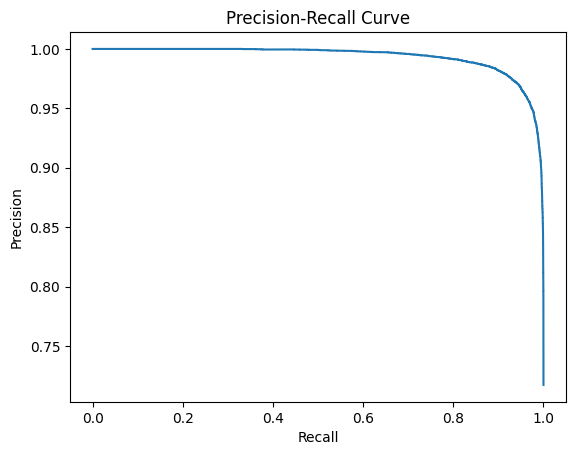

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Part 8 - Uso do Modelo


### **Função do uso em Inglês**


In [ ]:
def get_prediction(sentence):
  tokens = encode_sentence(sentence)

  input_ids = get_ids(tokens)
  input_mask = get_mask(tokens)
  segment_ids = get_segments(tokens)

  inputs = tf.stack(
      [
       tf.cast(input_ids, dtype=tf.int32),
       tf.cast(input_mask, dtype=tf.int32),
       tf.cast(segment_ids, dtype=tf.int32),
      ], axis = 0)
  inputs = tf.expand_dims(inputs, 0)

  output = Dcnn(inputs, training=False)

  sentiment = math.floor(output*2)

  if sentiment == 0:
    print("Output of the model: {}\nPredicted text GPT: negative".format(output))
  elif sentiment == 1:
    print("Output of the model: {}\nPredicted text GPT: positive".format(output))


### **Função do uso em Português**


In [ ]:
from googletrans import Translator

def get_predictions_portugues(sentence):
    translator = Translator()
    translated_sentence = translator.translate(sentence, src='pt', dest='en').text

    tokens = encode_sentence(translated_sentence)

    input_ids = get_ids(tokens)
    input_mask = get_mask(tokens)
    segment_ids = get_segments(tokens)

    inputs = tf.stack(
        [
            tf.cast(input_ids, dtype=tf.int32),
            tf.cast(input_mask, dtype=tf.int32),
            tf.cast(segment_ids, dtype=tf.int32),
        ], axis=0)
    inputs = tf.expand_dims(inputs, 0)

    output = Dcnn(inputs, training=False)

    sentiment = math.floor(output * 2)

    if sentiment == 0:
        print("Output of the model: {}\nPredicted text GPT: negative".format(output))
    elif sentiment == 1:
        print("Output of the model: {}\nPredicted text GPT: positive".format(output))


In [ ]:
get_predictions_portugues("No campo do aprendizado de máquina, discutimos os desafios enfrentados na construção de modelos robustos e escaláveis, bem como questões éticas relacionadas à interpretabilidade e equidade dos algoritmos. Na visão computacional, examinamos os avanços recentes na detecção e reconhecimento de objetos, bem como os obstáculos remanescentes na compreensão de contextos complexos e cenários dinâmicos. Em relação ao processamento de linguagem natural, investigamos as limitações atuais na compreensão semântica e na geração de texto coerente, além das implicações éticas do uso de modelos de linguagem de grande escala.")

Output of the model: [[0.89236397]]
Predicted text GPT: positive


In [ ]:
get_prediction("A Sturdy Woman. As a month slips away With no one bothering to inquire about her deeds Fulfilling what he left undone With emotions in scarce supply Calling out for heavenly assistance To avoid going insane and becoming a defendant Mapping out plans on a sheet of paper Constructing yet another tower of Babel in the process I won't deceive And certainly won't omit That she genuinely contemplates giving up So why persist with obligations? Numerous faces look alike With fragile egos Their spirits departed And paths diverged Bearing the weight of the world on her shoulders I'd wager a million on her behalf For her battle, no arguments can Claim credit for being our inspiration Due to her age Vanity is no longer as pronounced Acting authentically And captivating a few thousand")

Output of the model: [[0.00050486]]
Predicted text GPT: negative


In [ ]:
get_prediction("A big woman. So a month goes by With no one wanting to know what she did Completing what he didn't remake With your feelings in short supply Crying out for help from heaven So as not to go crazy and become a defendant Put your plans on a sheet of paper Thus building yet another tower of Babel I must not lie And much less omit That she really wants to give up So why insist on obligations? So many similar faces With your glass egos Having your spirit gone And their divided paths Carrying a world on your back For her I would make a million bets For her fight, there are no arguments that can Take the credit for being our inspiration Due to his age There is no longer so much vanity Acting naturally And enchanting a few thousand")

Output of the model: [[0.00049525]]
Predicted text GPT: negative


In [ ]:
get_predictions_portugues("No campo do aprendizado de máquina, discutimos os desafios enfrentados na construção de modelos robustos e escaláveis, bem como questões éticas relacionadas à interpretabilidade e equidade dos algoritmos. Na visão computacional, examinamos os avanços recentes na detecção e reconhecimento de objetos, bem como os obstáculos remanescentes na compreensão de contextos complexos e cenários dinâmicos. Em relação ao processamento de linguagem natural, investigamos as limitações atuais na compreensão semântica e na geração de texto coerente, além das implicações éticas do uso de modelos de linguagem de grande escala.")

Output of the model: [[0.89236397]]
Predicted text GPT: positive


In [ ]:
get_predictions_portugues("No campo do aprendizado de máquina, discutimos os desafios enfrentados na construção de modelos robustos e escaláveis, bem como questões éticas relacionadas à interpretabilidade e equidade dos algoritmos. Na visão computacional, examinamos os avanços recentes na detecção e reconhecimento de objetos, bem como os obstáculos remanescentes na compreensão de contextos complexos e cenários dinâmicos. Em relação ao processamento de linguagem natural, investigamos as limitações atuais na compreensão semântica e na geração de texto coerente, além das implicações éticas do uso de modelos de linguagem de grande escala.")

Output of the model: [[0.89236397]]
Predicted text GPT: positive


In [ ]:
get_predictions_portugues("No campo do aprendizado de máquina, discutimos os desafios enfrentados na construção de modelos robustos e escaláveis, bem como questões éticas relacionadas à interpretabilidade e equidade dos algoritmos. Na visão computacional, examinamos os avanços recentes na detecção e reconhecimento de objetos, bem como os obstáculos remanescentes na compreensão de contextos complexos e cenários dinâmicos. Em relação ao processamento de linguagem natural, investigamos as limitações atuais na compreensão semântica e na geração de texto coerente, além das implicações éticas do uso de modelos de linguagem de grande escala.")

Output of the model: [[0.89236385]]
Predicted text GPT: positive


In [ ]:
get_predictions_portugues("No campo do aprendizado de máquina, discutimos os desafios enfrentados na construção de modelos robustos e escaláveis, bem como questões éticas relacionadas à interpretabilidade e equidade dos algoritmos. Na visão computacional, examinamos os avanços recentes na detecção e reconhecimento de objetos, bem como os obstáculos remanescentes na compreensão de contextos complexos e cenários dinâmicos. Em relação ao processamento de linguagem natural, investigamos as limitações atuais na compreensão semântica e na geração de texto coerente, além das implicações éticas do uso de modelos de linguagem de grande escala.")

Output of the model: [[0.8923639]]
Predicted text GPT: positive


In [ ]:
get_predictions_portugues("No campo do aprendizado de máquina, discutimos os desafios enfrentados na construção de modelos robustos e escaláveis, bem como questões éticas relacionadas à interpretabilidade e equidade dos algoritmos. Na visão computacional, examinamos os avanços recentes na detecção e reconhecimento de objetos, bem como os obstáculos remanescentes na compreensão de contextos complexos e cenários dinâmicos. Em relação ao processamento de linguagem natural, investigamos as limitações atuais na compreensão semântica e na geração de texto coerente, além das implicações éticas do uso de modelos de linguagem de grande escala.")

Output of the model: [[0.892364]]
Predicted text GPT: positive


In [ ]:
get_predictions_portugues("No campo do aprendizado de máquina, discutimos os desafios enfrentados na construção de modelos robustos e escaláveis, bem como questões éticas relacionadas à interpretabilidade e equidade dos algoritmos. Na visão computacional, examinamos os avanços recentes na detecção e reconhecimento de objetos, bem como os obstáculos remanescentes na compreensão de contextos complexos e cenários dinâmicos. Em relação ao processamento de linguagem natural, investigamos as limitações atuais na compreensão semântica e na geração de texto coerente, além das implicações éticas do uso de modelos de linguagem de grande escala.")

Output of the model: [[0.892364]]
Predicted text GPT: positive


In [ ]:
get_prediction("In the field of machine learning, we discuss the challenges faced in building robust and scalable models, as well as ethical issues related to interpretability and fairness of algorithms. In computer vision, we examine recent advancements in object detection and recognition, as well as the remaining obstacles in understanding complex contexts and dynamic scenarios. Regarding natural language processing, we investigate current limitations in semantic understanding and coherent text generation, along with the ethical implications of using large-scale language models.")

Output of the model: [[0.9667361]]
Predicted text GPT: positive


In [ ]:
get_prediction("In the field of machine learning, we discuss the challenges faced in building robust and scalable models, as well as ethical issues related to interpretability and fairness of algorithms. In computer vision, we examine recent advancements in object detection and recognition, as well as the remaining obstacles in understanding complex contexts and dynamic scenarios. Regarding natural language processing, we investigate current limitations in semantic understanding and coherent text generation, along with the ethical implications of using large-scale language models.")

Output of the model: [[0.966736]]
Predicted text GPT: positive


In [ ]:
get_prediction("In the field of machine learning, we discuss the challenges faced in building robust and scalable models, as well as ethical issues related to interpretability and fairness of algorithms. In computer vision, we examine recent advancements in object detection and recognition, as well as the remaining obstacles in understanding complex contexts and dynamic scenarios. Regarding natural language processing, we investigate current limitations in semantic understanding and coherent text generation, along with the ethical implications of using large-scale language models.")

Output of the model: [[0.9667361]]
Predicted text GPT: positive


In [ ]:
get_prediction("Global warming, a consequence of anthropogenic activities, poses significant threats to ecosystems and human society. This paper synthesizes current research to elucidate the multifaceted impacts of global warming, focusing on its effects on ecosystems, biodiversity, weather patterns, and human health. The evidence overwhelmingly supports the conclusion that human-induced climate change is exacerbating environmental degradation, leading to biodiversity loss, extreme weather events, rising sea levels, and altered precipitation patterns. Moreover, the implications for human health are profound, with increased incidence of heat-related illnesses, vector-borne diseases, and food insecurity. Mitigation strategies, including reducing greenhouse gas emissions, transitioning to renewable energy sources, and implementing adaptive measures, are imperative to mitigate the adverse effects of global warming and safeguard the planet for future generations.")

Output of the model: [[0.9950642]]
Predicted text GPT: positive


In [ ]:
get_prediction("Global warming has profound implications for terrestrial and aquatic ecosystems, disrupting key ecological processes and endangering biodiversity. Rising temperatures alter species distributions, disrupt phenological cycles, and exacerbate habitat loss, leading to shifts in species composition and ecosystem functioning. Coral reefs, among the most biodiverse ecosystems on the planet, are particularly vulnerable to the effects of global warming, with widespread coral bleaching events and ecosystem collapse observed in recent decades. Furthermore, changes in temperature and precipitation patterns affect ecosystem services, such as water provision, pollination, and carbon sequestration, with far-reaching consequences for human well-being.")

Output of the model: [[0.97711176]]
Predicted text GPT: positive


In [ ]:
get_predictions_portugues("O aquecimento global, uma consequência das atividades antropogênicas, apresenta ameaças significativas aos ecossistemas e à sociedade humana. Este artigo sintetiza pesquisas atuais para elucidar os impactos multifacetados do aquecimento global, focando em seus efeitos nos ecossistemas, biodiversidade, padrões climáticos e saúde humana. As evidências sustentam de forma avassaladora a conclusão de que a mudança climática induzida pelo homem está exacerbando a degradação ambiental, levando à perda de biodiversidade, eventos climáticos extremos, aumento do nível do mar e padrões de precipitação alterados. Além disso, as implicações para a saúde humana são profundas, com o aumento da incidência de doenças relacionadas ao calor, doenças transmitidas por vetores e insegurança alimentar. Estratégias de mitigação, incluindo a redução das emissões de gases de efeito estufa, transição para fontes de energia renovável e implementação de medidas adaptativas, são imperativas para mitigar os efeitos adversos do aquecimento global e proteger o planeta para as gerações futuras.")

Output of the model: [[0.995624]]
Predicted text GPT: positive


In [ ]:
get_prediction("Mitigating the impacts of global warming requires urgent and coordinated action at local, national, and global levels. Transitioning to renewable energy sources, such as solar and wind power, is essential to reduce greenhouse gas emissions and mitigate climate change. Additionally, reforestation and afforestation efforts can enhance carbon sequestration and biodiversity conservation. Adaptation measures, including improved infrastructure, early warning systems, and sustainable land management practices, are also crucial to build resilience to climate impacts. However, effective climate action requires political will, financial investment, and international cooperation to address the root causes of global warming and ensure a sustainable future for all.")

Output of the model: [[0.99829143]]
Predicted text GPT: positive


In [ ]:
from googletrans import Translator

def get_predictions():
    print("Selecione o idioma do texto original:")
    print("1. Português")
    print("2. Inglês")
    choice = input("Escolha uma opção (1/2): ")

    source_language = 'pt' if choice == '1' else 'en'

    sentence = input("Digite o texto: ")

    translator = Translator()
    translated_sentence = translator.translate(sentence, src=source_language, dest='en').text

    tokens = encode_sentence(translated_sentence)

    input_ids = get_ids(tokens)
    input_mask = get_mask(tokens)
    segment_ids = get_segments(tokens)

    inputs = tf.stack(
        [
            tf.cast(input_ids, dtype=tf.int32),
            tf.cast(input_mask, dtype=tf.int32),
            tf.cast(segment_ids, dtype=tf.int32),
        ], axis=0)
    inputs = tf.expand_dims(inputs, 0)

    output = Dcnn(inputs, training=False)

    sentiment = math.floor(output * 2)

    if sentiment == 0:
        print("Output of the model: {}\nPredicted text GPT: negative".format(output))
    elif sentiment == 1:
        print("Output of the model: {}\nPredicted text GPT: positive".format(output))

get_predictions()

Selecione o idioma do texto original:
1. Português
2. Inglês
Escolha uma opção (1/2): 1
Digite o texto: Aleki comeu cu de curioso
Output of the model: [[0.06037956]]
Predicted text GPT: negative


In [ ]:
from googletrans import Translator

def get_predictions():
    print("Selecione o idioma do texto original:")
    print("1. Português")
    print("2. Inglês")
    choice = input("Escolha uma opção (1/2): ")

    source_language = 'pt' if choice == '1' else 'en'

    sentence = input("Digite o texto: ")

    translator = Translator()
    translated_sentence = translator.translate(sentence, src=source_language, dest='en').text

    tokens = encode_sentence(translated_sentence)

    input_ids = get_ids(tokens)
    input_mask = get_mask(tokens)
    segment_ids = get_segments(tokens)

    inputs = tf.stack(
        [
            tf.cast(input_ids, dtype=tf.int32),
            tf.cast(input_mask, dtype=tf.int32),
            tf.cast(segment_ids, dtype=tf.int32),
        ], axis=0)
    inputs = tf.expand_dims(inputs, 0)

    output = Dcnn(inputs, training=False)

    sentiment = math.floor(output * 2)

    if sentiment == 0:
        print("Output of the model: {}\nPredicted text GPT: negative".format(output))
    elif sentiment == 1:
        print("Output of the model: {}\nPredicted text GPT: positive".format(output))

get_predictions()

Selecione o idioma do texto original:
1. Português
2. Inglês
Escolha uma opção (1/2): 1
Digite o texto: estou numa casa (a minha antiga), meu irmão endoida achando q tem gente tentando matar ele, depois de calmo, é hora de ir pra praia passar o ano novo. Na primeira eu fico com um pessoal q eu não realmente conheço, pergunta pra uma delas oq vamos beber e ela me estranha, pergunto pro meu primo se tem daquele whisky que bebemos no último ano novo e percebo q tá cedo demais pra um outro réveillon. Começo andar pela praia tendo um panorama do lugar e percebo como ninguém está lá para comemorar a virada de ano - e usam alguma vestimenta amarela - acho meu amigo e choro percebendo como ninguém me escuta - até minha mãe - e tomo conta da minha situação. Após isso tento fugir e quando saio da praia vejo um mundo pós apocalíptico onde um (fungo) tomo conta e os infectados se isolam
Output of the model: [[0.02298404]]
Predicted text GPT: negative


In [ ]:
from googletrans import Translator

def get_predictions():
    print("Selecione o idioma do texto original:")
    print("1. Português")
    print("2. Inglês")
    choice = input("Escolha uma opção (1/2): ")

    source_language = 'pt' if choice == '1' else 'en'

    sentence = input("Digite o texto: ")

    translator = Translator()
    translated_sentence = translator.translate(sentence, src=source_language, dest='en').text

    tokens = encode_sentence(translated_sentence)

    input_ids = get_ids(tokens)
    input_mask = get_mask(tokens)
    segment_ids = get_segments(tokens)

    inputs = tf.stack(
        [
            tf.cast(input_ids, dtype=tf.int32),
            tf.cast(input_mask, dtype=tf.int32),
            tf.cast(segment_ids, dtype=tf.int32),
        ], axis=0)
    inputs = tf.expand_dims(inputs, 0)

    output = Dcnn(inputs, training=False)

    sentiment = math.floor(output * 2)

    if sentiment == 0:
        print("Output of the model: {}\nPredicted text GPT: negative".format(output))
    elif sentiment == 1:
        print("Output of the model: {}\nPredicted text GPT: positive".format(output))

get_predictions()

Selecione o idioma do texto original:
1. Português
2. Inglês
Escolha uma opção (1/2): 1
Digite o texto: estou numa casa (a minha antiga), meu irmão endoida achando q tem gente tentando matar ele, depois de calmo, é hora de ir pra praia passar o ano novo. Na primeira eu fico com um pessoal q eu não realmente conheço, pergunta pra uma delas oq vamos beber e ela me estranha, pergunto pro meu primo se tem daquele whisky que bebemos no último ano novo e percebo q tá cedo demais pra um outro réveillon. Começo andar pela praia tendo um panorama do lugar e percebo como ninguém está lá para comemorar a virada de ano - e usam alguma vestimenta amarela - acho meu amigo e choro percebendo como ninguém me escuta - até minha mãe - e tomo conta da minha situação. Após isso tento fugir e quando saio da praia vejo um mundo pós apocalíptico onde um (fungo) tomo conta e os infectados se isolam
Output of the model: [[0.02298404]]
Predicted text GPT: negative
